### a) Run a demo program using standard graphics library e.g. OpenGL.

In [1]:
import pygame
from pygame.locals import *

from OpenGL.GL import *
from OpenGL.GLU import *

pygame 2.0.0 (SDL 2.0.12, python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
vertices = (
    (1,-1, -1),
    (1, 1,-1),
    (-1,1,-1),
    (-1,-1,-1),
    (1,-1, 1),
    (1, 1, 1),
    (-1,-1,1),
    (-1, 1,1),
)

edges = (
    (0,1),
    (0,3),
    (0,4),
    (2,1),
    (2,3),
    (2,7),
    (6,3),
    (6,4),
    (6,7),
    (5,1),
    (5,4),
    (5,7)
)

In [3]:
def cube():
    glBegin(GL_LINES)
    for edge in edges:
        for vertex in edge:
            glVertex3fv(vertices[vertex])
    glEnd()

In [1]:
def main():
    pygame.init()
    display = (800,600)
    pygame.display.set_mode(display, DOUBLEBUF|OPENGL)
    
    gluPerspective(45, display[0]/display[1], 0.1, 50.0)
    
    glTranslatef(0.0, 0.0, -5)
    
    glRotatef(0, 0 , 0 , 0)
    
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
        
        glRotatef(1, 3 , 1 , 1)
        glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
        cube()
        pygame.display.flip()
        pygame.time.wait(10)

In [ ]:
#Call the main function
main()

### d) Run a demo program using standard vision library. e.g. OpenCV.

In [3]:
import cv2
 
img = cv2.imread("caa.JPG")

#cv2.line(input_image,start_coordinates,end_coordinates,color, thickness)
img = cv2.rectangle(img, (200,450), (450,210), (255,0,0), 2)

cv2.imshow("rectangle", img) 
cv2.waitKey()
cv2.destroyAllWindows()


### e) Load your own image/satellite image and display its rgb, grayscale, binary and float/normalized(Range: 0-1) version. Comment on the changes you can observe w.r.t properties and visualization.
### o) Write a program to read rgb image and display its gray scale version and the objective is to change the properties of image.

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from PIL import Image

In [15]:
image = mpimg.imread("daisy.jpg")

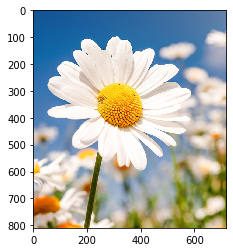

In [16]:
#Displaying RGB image

plt.imshow(image)
plt.show()

In [36]:
image = Image.open("daisy.jpg")
copy_image = plt.imread("daisy.jpg")

print('Format:',image.format)
print('Mode:',image.mode)
print('Shape:',copy_image.shape)
pixels = copy_image.shape[0]*copy_image.shape[1]
print('Total pixels:',pixels)
depth = len(set(image.getdata()))
print("Colors count: ",depth)

Format: JPEG
Mode: RGB
Shape: (810, 720, 3)
Total pixels: 583200
Colors count:  113878


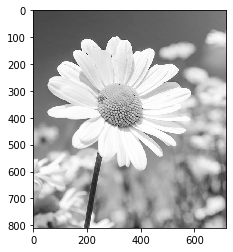

In [18]:
#Displaying Grayscale image

fig_name = 'daisy.jpg'
image = Image.open(fig_name).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [37]:
image = Image.open("grayscale.png")
copy_image = plt.imread("grayscale.png")

print('Format:',image.format)
print('Mode:',image.mode)
print('Shape:',copy_image.shape)
pixels = copy_image.shape[0]*copy_image.shape[1]
print('Total pixels:',pixels)
depth = len(set(image.getdata()))
print("Colors count: ",depth)

Format: PNG
Mode: LA
Shape: (810, 720, 4)
Total pixels: 583200
Colors count:  245


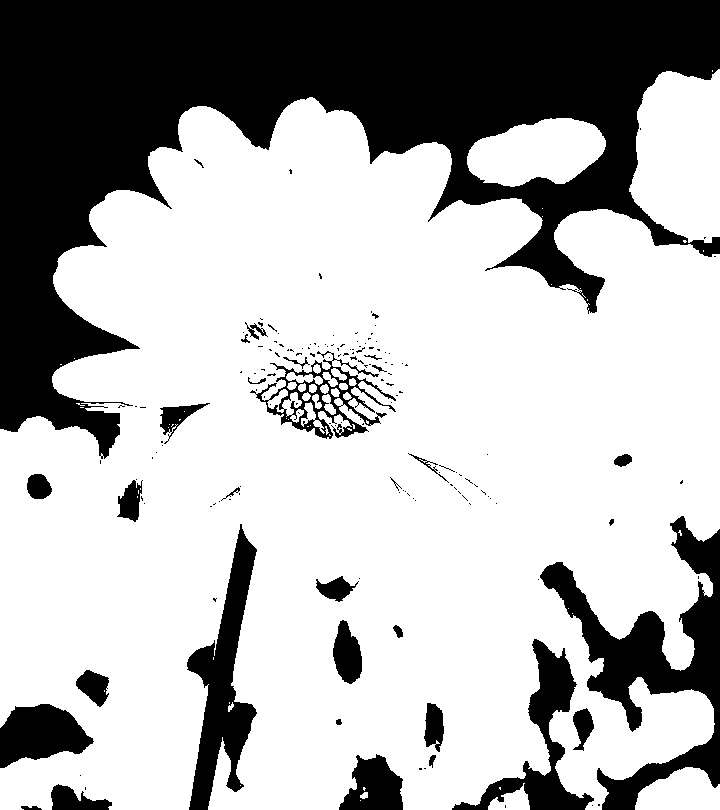

In [10]:
#Displaying Binary image

from IPython.display import display, Image

#reading image
img = cv2.imread("daisy.jpg",0)
#cv2.imshow("Gray",img)
#cv2.waitKey(0)

# < 127- black & >127- white
ret, bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#cv2.imshow("Binary",bw)
#cv2.waitKey(0)

#Saving image
cv2.imwrite('Binary.jpg', bw)

#displaying image
display(Image('Binary.jpg'))
#cv2.destroyAllWindows()

In [38]:
image = Image.open('Binary.jpg')
copy_image = plt.imread('Binary.jpg')

print('Format:',image.format)
print('Mode:',image.mode)
print('Shape:',copy_image.shape)
pixels = copy_image.shape[0]*copy_image.shape[1]
print('Total pixels:',pixels)
depth = len(set(image.getdata()))
print("Colors count: ",depth)

Format: JPEG
Mode: L
Shape: (810, 720)
Total pixels: 583200
Colors count:  18


In [ ]:
'''
---------------------------------------
    MODE:
---------------------------------------
1 (1-bit pixels, black and white, stored with one pixel per byte)
L (8-bit pixels, black and white)
P (8-bit pixels, mapped to any other mode using a colour palette)
RGB (3x8-bit pixels, true colour)
RGBA (4x8-bit pixels, true colour with transparency mask)
CMYK (4x8-bit pixels, colour separation)
YCbCr (3x8-bit pixels, colour video format)
I (32-bit signed integer pixels)
F (32-bit floating point pixels)
'''

### m) Write a program to display your image, select a rectangular portion of it and save its bounding box in a .csv file. A loop on this scheme is appreciated

In [3]:
import cv2

img = cv2.imread('caa.JPG')
height, width = img.shape[:2]  #:2 for using width and height from 'shape'

start_row, start_col = int(height*.45), int(width*.25)  #45% height and 25% width

end_row, end_col = int(height*.75), int(width*.75)

cropped = img[start_row:end_row, start_col:end_col]

#For displaying original image
cv2.imshow('original',img)
cv2.waitKey(0)

#For displaying cropped image
cv2.imshow('cropped',cropped)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [4]:
from PIL import Image
import numpy as np
import sys
import os
import csv

In [7]:
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

mydir='C:/Users/faiq/Desktop/Comp Graphics/Week_2'

In [9]:
#load the original image
fileList = createFileList(mydir)

for file in fileList:
    print(file)
    img_file = Image.open(file)
    img_file.show()

C:/Users/faiq/Desktop/Comp Graphics/Week_2
C:/Users/faiq/Desktop/Comp Graphics/Week_2\Binary.jpg
C:/Users/faiq/Desktop/Comp Graphics/Week_2\caa.jpg
C:/Users/faiq/Desktop/Comp Graphics/Week_2\daisy.jpg


In [11]:
# get original image parameters
width, height = img_file.size
format = img_file.format
mode = img_file.mode

# Make image Greyscale
img_grey = img_file.convert('L')
img_grey.save('result.png')
img_grey.show()

# Save Greyscale values
value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
value = value.flatten()
print(value)
with open("img_pixels.csv", 'a') as f:
    writer = csv.writer(f)
    writer.writerow(value)

[ 71  71  71 ... 184 188 192]
